# Exploration_1
## 1.1 프로젝트 설정
### 1.11 라이브러리 및 모듈 임포트

In [1]:
import tensorflow as tf, tensorflow_datasets as tfds, keras
from keras import layers, models
import models_base, models_top, utils

print(tf.__version__)
print(tfds.__version__)


2025-01-24 17:42:19.384647: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 17:42:19.395665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737708139.407086  180443 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737708139.410193  180443 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 17:42:19.423218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0
4.9.7


### 1.12 데이터셋 다운로드 및 확인

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/home/technocracy90/keras/exp_1/data/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


2025-01-24 17:43:44.723062: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-24 17:43:44.932799: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-24 17:43:44.945700: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


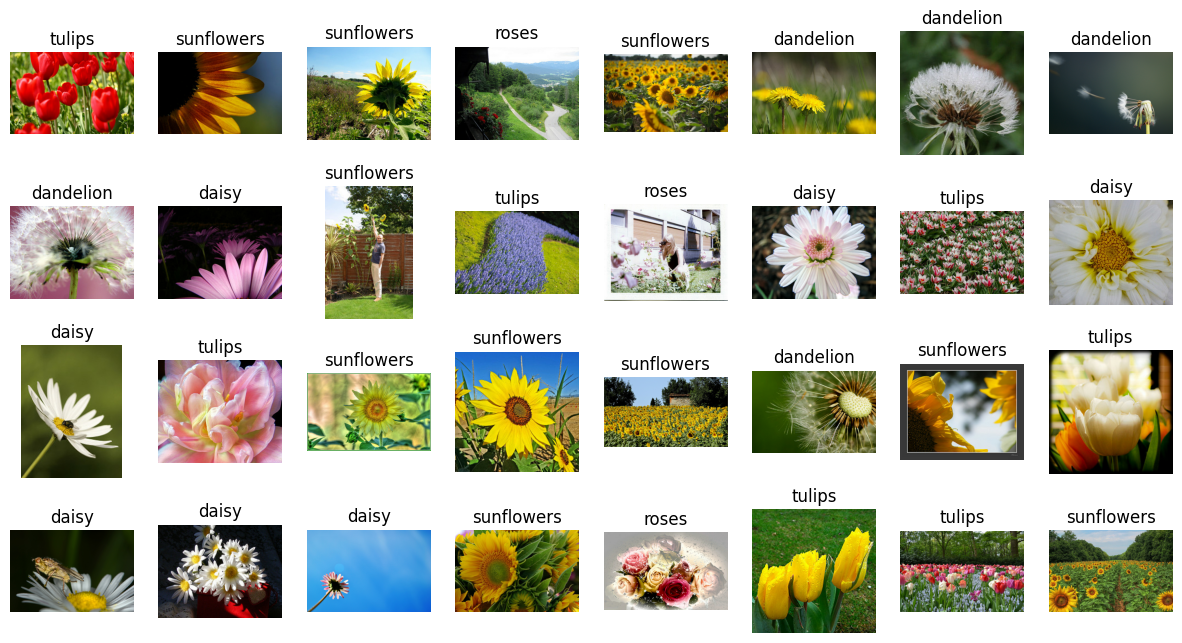

In [4]:
# Load the dataset
(raw_train, raw_validation, raw_test), dataset_info = tfds.load(
    name='tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='~/keras/exp_1/data/',
    download=True,
    with_info=True,
    as_supervised=True,
)

# Print the dataset info
print(dataset_info)

utils.example_display(dataset_info, raw_train, num_examples=32, is_raw = True)

### 1.13 데이터셋 전처리 및 적재

2025-01-24 17:43:48.791156: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-24 17:43:48.799346: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


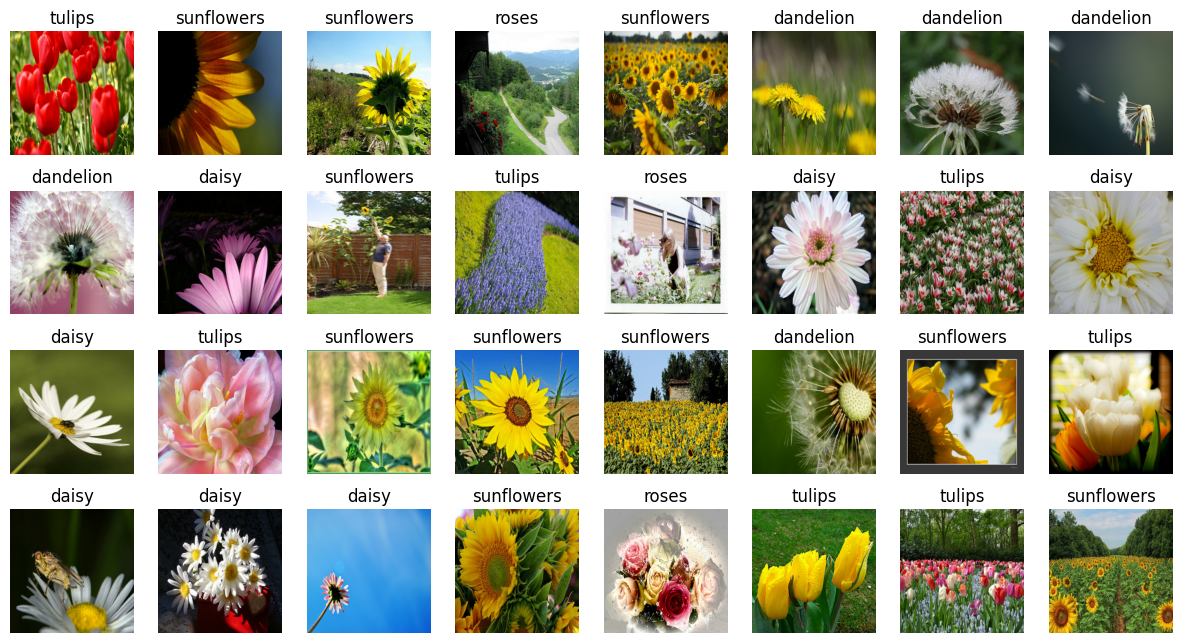

In [5]:
train = raw_train.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))
validation = raw_validation.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))
test = raw_test.map(lambda x, y: utils.resize_and_rescale(x, y, size=(240, 240)))

utils.example_display(dataset_info, train, num_examples=32, is_raw = False)

## 1.2 모델 설정

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 240, 240, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 120, 120, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 120, 120, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,429 (232.14 KB)

 Trainable params: 59,429 (232.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1737708281.278401  180591 service.cc:148] XLA service 0x7f87180179f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737708281.278506  180591 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-24 17:44:41.300600: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737708281.373165  180591 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-01-24 17:44:41.890998: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_211', 4 bytes spill stores, 4 bytes spill loads



 5/46 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2126 - loss: 1.6144

I0000 00:00:1737708287.100872  180591 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2870 - loss: 1.5299

2025-01-24 17:44:49.892085: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_450', 72 bytes spill stores, 72 bytes spill loads



46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - accuracy: 0.2899 - loss: 1.5253 - val_accuracy: 0.4796 - val_loss: 1.2696
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4669 - loss: 1.2398 - val_accuracy: 0.4986 - val_loss: 1.2206
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4600 - loss: 1.2021 - val_accuracy: 0.5341 - val_loss: 1.1507
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4943 - loss: 1.1493 - val_accuracy: 0.5668 - val_loss: 1.0979
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5301 - loss: 1.1069 - val_accuracy: 0.6076 - val_loss: 1.0344
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5522 - loss: 1.0737 - val_accuracy: 0.5940 - val_loss: 1.0521
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5748 - loss: 1.0548 - val_accuracy: 0.5831 - val_loss: 1.0719
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ -1s -21693us/step - accuracy: 0.5790 - loss: 1.0293 - val_accuracy: 0.5640 

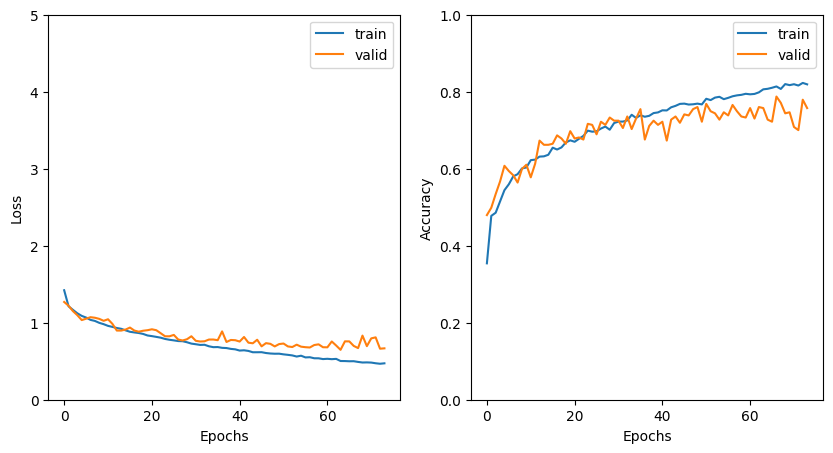

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7830 - loss: 0.6065
Test accuracy: 0.81%, Test loss: 0.54


In [8]:
basic = models_base.simple1()
basic.summary()

basic.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_batch, val_batch = utils.get_batches(train, validation, batch_size=64)

basic_history = basic.fit(train_batch,
                          validation_data=val_batch,
                          epochs=200,
                          callbacks=utils.callback_earlystop(10),
                          )

utils.plot_history(basic_history)

test_loss, test_acc = basic.evaluate(test.batch(64))
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


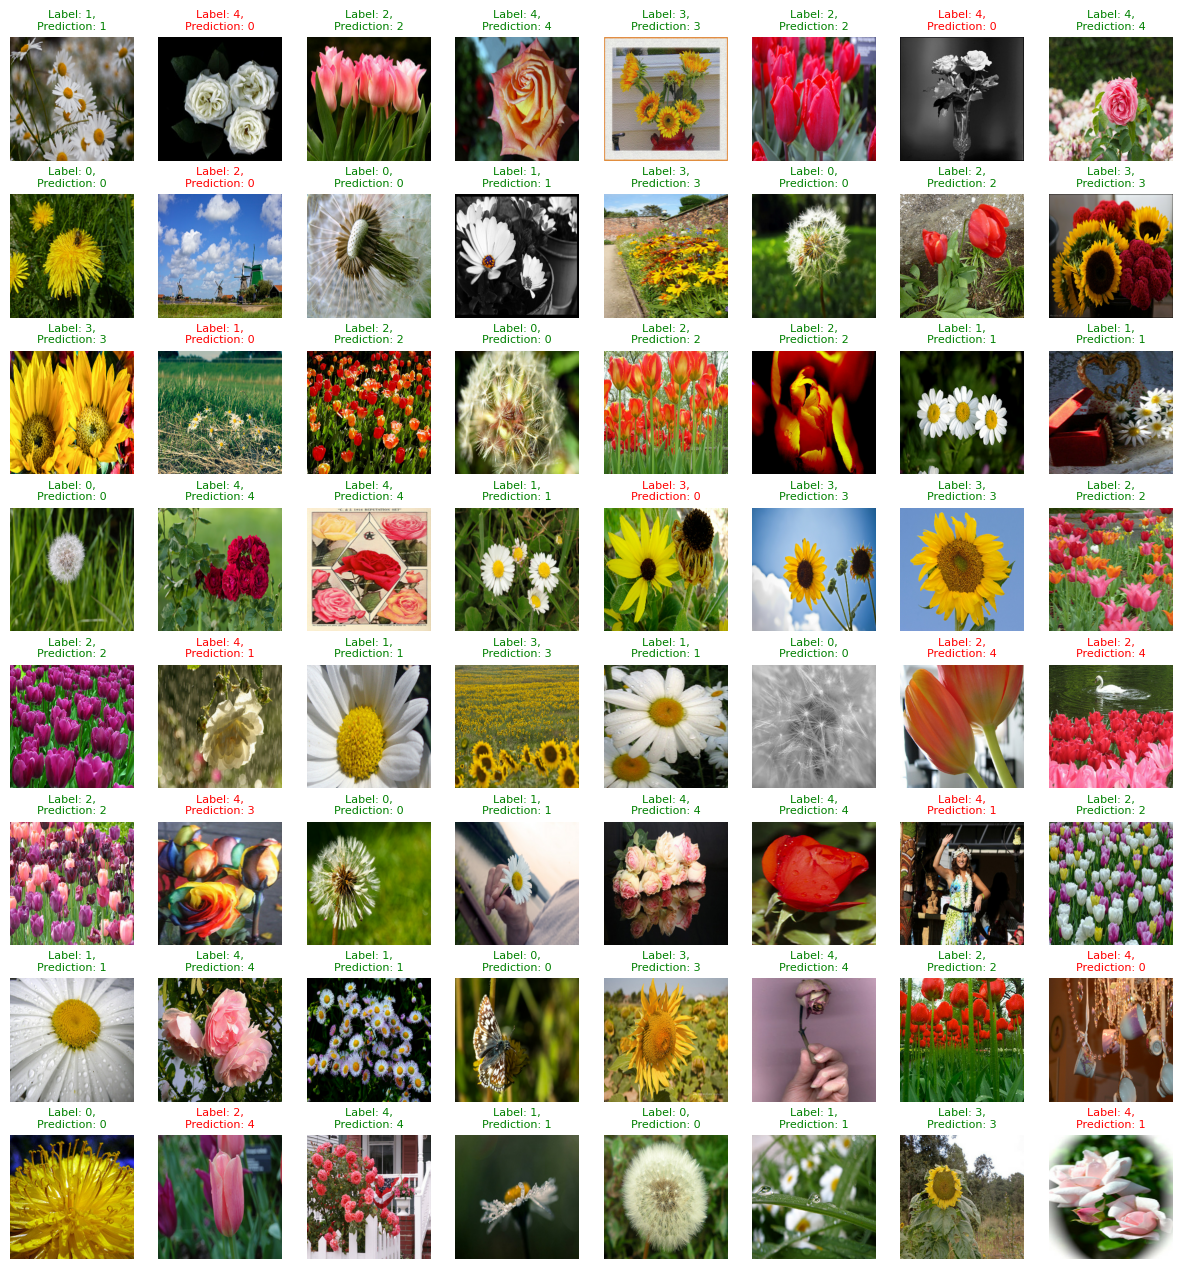

In [8]:
utils.plot_prediction(basic, test, batch_size=64)

In [11]:
# designing the model

def eV2L_midsize3(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(240, 240, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.EV2L((240, 240, 3))(x, training=False)
    x = models_top.midsize1()(x)
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
                   metrics=['accuracy'])
    
    return model

midsize3 = eV2L_midsize3()
midsize3.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 240, 240, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 8, 8, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_midsize1 (Sequential)     │ (None, 256)            │     1,049,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,798,253 (453.18 MB)

 Trainable params: 1,051,398 (4.01 MB)

 Non-trainable params: 117,746,855 (449.17 MB)

In [12]:
midsize3.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

midsize3_history = midsize3.fit(train_batch,
                                validation_data=val_batch,
                                epochs=200,
                                callbacks=utils.callback_earlystop(10),
                                )

utils.plot_history(midsize3_history)

utils.plot_prediction(midsize3, test, batch_size=64)

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 45s 515ms/step - accuracy: 0.2195 - loss: 1.6640 - val_accuracy: 0.4687 - val_loss: 1.5146
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 405ms/step - accuracy: 0.2755 - loss: 1.5732 - val_accuracy: 0.4768 - val_loss: 1.3989
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 351ms/step - accuracy: 0.3039 - loss: 1.5169 - val_accuracy: 0.4496 - val_loss: 1.3590
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 372ms/step - accuracy: 0.3441 - loss: 1.4806 - val_accuracy: 0.4796 - val_loss: 1.3526
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 344ms/step - accuracy: 0.3372 - loss: 1.4557 - val_accuracy: 0.4768 - val_loss: 1.2814
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 364ms/step - accuracy: 0.3583 - loss: 1.4455 - val_accuracy: 0.4142 - val_loss: 1.3223
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.3627 - loss: 1.4356 - val_accuracy: 0.4905 - val_loss: 1.2665
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 353ms/step - accuracy: 0.3795 - loss: 1.4185 - 

KeyboardInterrupt: 